## Métodos de Aprendizado de Máquina em Química
 
Prof. Luciano T. Costa \
e-mail: ltcosta@id.uff.br \
Departamento de Físico-Química \
Sala 309 \
Prof. Eduardo Krampser \
e-mail: eduardo.krempser@fiocruz.br \
MolMod-CS: www.molmodcs.uff.br \
Facebook: https://www.facebook.com/molmodcs \
Linkedin: https://www.linkedin.com/in/luciano-t-costa-90a85a164/ 

### RDkit: O que é?

   O projeto [`RDkit`](https://www.rdkit.org/docs/GettingStartedInPython.html) trata-se de um conjunto de bibliotecas e módulos desenvolvidos para serem aplicados em quimioinformática e aprendizado de máquina (ML, do inglês *machine learning*) no espaço de estruturas químicas, ou seja, como ler, representar e interpretar dados de estruturas químicas em 2D e 3D para metadados numéricos como entrada para algoritmos de ML. Para quem tiver interesse em estar envolvido com as discussões sobre o uso do RDkit, pode escrever para a *mailing list* em: rdkit-devel@lists.sourceforge.net.


#### Lendo, Desenhando e Escrevendo moléculas

   A maioria das funcionalidades básicas do RDkit é encontrada no módulo `rdkit.Chem`

    
    

### O que são SMILES?


[`SMILES`](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) (Simplified Molecular Input Line Entry System) é um sistema de notação química desenvolvido para o processamento da informação química. Baseado nos princípios da teoria de grafos, o sistema permite a representação de moléculas de uma forma simples e eficiente. Uma evolução dos SMILES é a estrutura de notação [`SMARTS`](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification#Recursive_SMARTS). Para uma compreensão mais aprofundada e detalhada ver [`link`](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html). Segue abaixo as referências originais do desenvolvimento:

[1] Weininger D (February 1988). "SMILES, a chemical language and information system. 1. Introduction to methodology and encoding rules". Journal of Chemical Information and Computer Sciences. 28 (1): 31–6. [`doi`](https://pubs.acs.org/doi/abs/10.1021/ci00057a005)

[2] Weininger D, Weininger A, Weininger JL (May 1989). "SMILES. 2. Algorithm for generation of unique SMILES notation". Journal of Chemical Information and Modeling. 29 (2): 97–101. [`doi`](https://pubs.acs.org/doi/abs/10.1021/ci00062a008)

[3] Weininger D (August 1990). "SMILES. 3. DEPICT. Graphical depiction of chemical structures". Journal of Chemical Information and Modeling. 30 (3): 237–43. [`doi`](https://pubs.acs.org/doi/abs/10.1021/ci00067a005)


## Importando Bibliotecas

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

ModuleNotFoundError: No module named 'rdkit'

## Mol para Smiles

O contrário também é possível, convertendo o formato `mol` de estrutura química para `SMILES` com o uso do módulo [`MolToSmiles`](https://www.herongyang.com/Cheminformatics/RDKit-rdkit-Chem-rdmolfiles-SMILES-Format.html), como exemplificado abaixo:

In [5]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

## Peso da Molécula

É possível também, de forma muito simples, imprimir a massa molar de uma molécula:

In [8]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

## Subestruturas

Além disso, é possível a atribuição de várias moléculas em uma lista, para inúmeros usos, utilizando-se principalmente da descrição por SMILES para isso, como no exemplo a seguir:

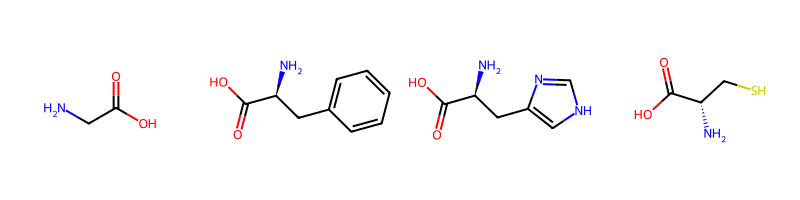

In [9]:
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'O=C([C@H](CC1=CNC=N1)N)O', 'C([C@@H](C(=O)O)N)S']

mol_list = []
for smiles in smiles_list:
   mol = Chem.MolFromSmiles(smiles) # Converte a molécula atual em Mol através do Smiles da primeira lista
   mol_list.append(mol) # Atribui a molécula convertida na nova lista criada (mol_list)
   
Draw.MolsToGridImage(mol_list, molsPerRow=4) # Exibe as moléculas da mol_list

## Busca de padrões

É possível buscar padrões que sejam comuns a alguma molécula contida em uma lista, desde padrões simples até padrões complexos, no exemplo abaixo iremos buscar por moléculas que contenham enxofre

In [10]:
pattern = Chem.MolFromSmiles('S') # Estruturas que possuem S (enxofre)
for mol in mol_list:
   print(mol.HasSubstructMatch(pattern)) # Retorna true (caso exista na molécula) ou false (caso não exista)

False
False
False
True


### SMARTS

Há também o método SMARTS, para caso seja necessário encontrar algum padrão mais complexo do que o comum, como um anel por exemplo, assim como no código abaixo.

In [11]:
pattern2 = Chem.MolFromSmarts('[r5]') # Estruturas que possuem anéis com 5 lados, podendo ser quantos lados quiser
for mol in mol_list:
   print(mol.HasSubstructMatch(pattern2))

False
False
True
False


## [Fingerprints](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf)

### O que são?
As *Molecular Fingerprints* são uma maneira de representar moléculas como objetos matemáticos, ao transformar a molécula em um vetor de bits, os quais representam os átomos e ligações da molécula.

A forma de se obter as *Morgan Fingerprints* são através da função [AllChem.GetMorganFingerprintAsBitVect()](https://www.programcreek.com/python/example/89502/rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect), basta clicar sobre o nome da função para ser redirecionado a uma publicação com mais exemplos.

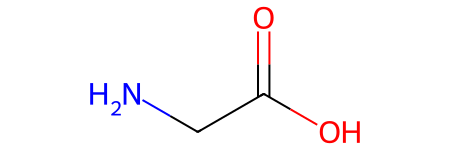

In [12]:
glycine = mol_list[0]
glycine

In [13]:
bi = {}

fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi) # Os inputs são, em ordem, a molécula desejada, o raio, o número de bits e onde serão salvos os bits
fp_arr = np.zeros((1,))

DataStructs.ConvertToNumpyArray(fp, fp_arr)

np.nonzero(fp_arr)

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

Caso deseje, é possível também exibir os Fingerprints com a função abaixo:

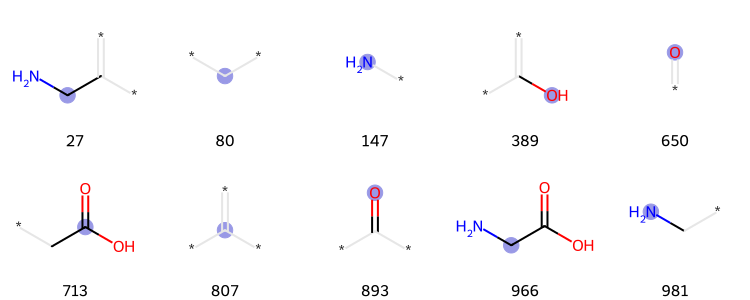

In [16]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()] # GetOnBits() obtém os bits ativados de fp
Draw.DrawMorganBits(prints, molsPerRow=5, legends=[str(x) for x in fp.GetOnBits()]) # DrawMorganBits é a função utilizada para visualizar as impressões moleculares

## Similaridade

É possível também, analisar a [similaridade entre moléculas](https://www.herongyang.com/Cheminformatics/RDKit-Molecule-Similarity-Based-on-Fingerprints.html) com as seguintes funções

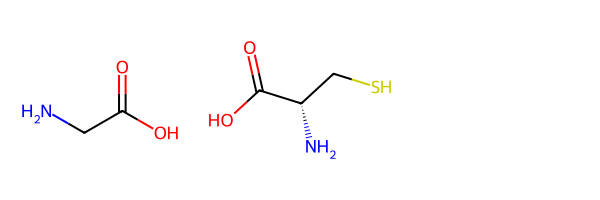

In [17]:
cysteine = mol_list[3]
Draw.MolsToGridImage([glycine, cysteine])

In [18]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print('cys =', list(fp2.GetOnBits()))
print('gly =', list(fp.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits()) # Pega os elementos que as duas moléculas tem em comum
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits()) # Combina os elementos das duas moléculas

print('\n')

print(f'In common =', common)
print(f'Combined =', combined)
print(f'Similarity Score =', len(common)/len(combined))

cys = [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly = [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In common = {389, 807, 650, 80, 147, 893}
Combined = {1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
Similarity Score = 0.3


### [Tanimoto Similarity](https://www.pinecone.io/learn/roughly-explained/tanimoto-similarity/)

A função a seguir vem para simplificar o processo exibido acima, sendo uma alternativa muito mais simples para se obter o Similarity Score entre as duas moléculas, sem precisar atribuir a variáveis os elementos comuns e combinados

In [19]:
print(f'Similarity Score = {DataStructs.TanimotoSimilarity(fp, fp2)}')

Similarity Score = 0.3


## Outros Exemplos

In [10]:
m = Chem.MolFromMolFile('data/13-dimethyl-1H-imidazol-3-ium.mol')

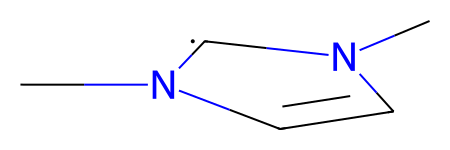

In [11]:
m

In [15]:
stringWithMolData=open('data/input.mol','r').read()

In [16]:
m = Chem.MolFromMolBlock(stringWithMolData)

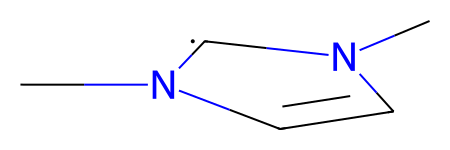

In [17]:
m

Todas as funções acima retornam o objeto `rdkit.Chem.rdchem.Mol` com sucesso.

Um objeto [`rdkit.Chem.rdchem.Mol`](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol) pode ser mostrado graficamente usando [`rdkit.Chem.Draw.MolToImage()`](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html#rdkit.Chem.Draw.MolToImage):

In [18]:
from rdkit.Chem import Draw

In [19]:
img = Draw.MolToImage(m)

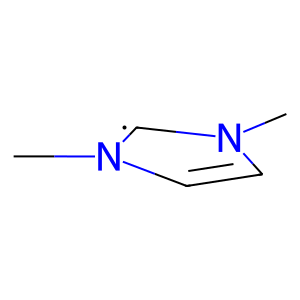

In [20]:
img

Há um esforço em gerar erros quando são fornecidos SMILES com problema em sua formatação:

In [21]:
m1 = Chem.MolFromSmiles('CO(C)C')

[18:16:00] Explicit valence for atom # 1 O, 3, is greater than permitted


In [22]:
m2 = Chem.MolFromSmiles('c1cc1')

[18:16:14] Can't kekulize mol.  Unkekulized atoms: 0 1 2


In [24]:
m1 is None

True

In [25]:
m2 is None

True

#### Lendo um conjunto de moléculas

Grupos de moléculas são lidos usando um `Supplier`: (por exemplo, um [`rdkit.Chem.rdmolfiles.SDMolSupplier`](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.SDMolSupplier) ou um [`rdkit.Chem.rdmolfiles.SmilesMolSupplier`](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.SmilesMolSupplier)):

In [33]:
suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')

In [34]:
for mol in suppl:
    print(mol.GetNumAtoms())


20
24
24
26


Pode-se também construir listas de moléculas de um `Supplier`:

In [35]:
mols = [x for x in suppl]

In [36]:
len(mols)

4

In [37]:
mols

In [38]:
suppl[0].GetNumAtoms()

20

Pode-se também checar se foi ou não encontrado a info num arquivo com o `Supplier`:

In [39]:
with Chem.SDMolSupplier('data/5ht3ligs.sdf') as suppl:

  for mol in suppl:

    if mol is None: continue

    print(mol.GetNumAtoms())

20
24
24
26


Um tipo alternativo de `Supplier`, o [`rdkit.Chem.rdmolfiles.ForwardSDMolSupplier`](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.ForwardSDMolSupplier) pode ser usado para ler objetos tipo arquivo:

In [40]:
inf = open('data/5ht3ligs.sdf','rb')

with Chem.ForwardSDMolSupplier(inf) as fsuppl:

  for mol in fsuppl:

    if mol is None: continue

    print(mol.GetNumAtoms())

20
24
24
26


Isto significa que eles podem ser usados para ler arquivos zipados:

In [41]:
import gzip

In [42]:
inf = gzip.open('data/actives_5ht3.sdf.gz')

In [43]:
with Chem.ForwardSDMolSupplier(inf) as gzsuppl:

   ms = [x for x in gzsuppl if x is not None]

In [44]:
len(ms)

180

Note que o `ForwardSDMolSuppliers` não pode ser usado para acessar objetos de forma randômica:

In [45]:
inf = open('data/5ht3ligs.sdf','rb')

In [51]:
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
    fsuppl[0]

TypeError: 'ForwardSDMolSupplier' object is not subscriptable

#### Escrevendo Moléculas

In [52]:
# para SMILES

In [53]:
m = Chem.MolFromMolFile('data/chiral.mol')

In [54]:
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'

In [55]:
Chem.MolToSmiles(m,isomericSmiles=False)

'CC(O)c1ccccc1'

Note que os SMILES fornecidos estão na forma CANÔNICA, então a saída deve ser a mesma independente da molécula. Se a forma de Kekule dos SMILES é preferida, pode-se usar a forma `kekuleSmiles`:

In [56]:
Chem.Kekulize(m)

In [57]:
Chem.MolToSmiles(m,kekuleSmiles=True)

'C[C@H](O)C1=CC=CC=C1'

[`MDL Mol`](https://docs.chemaxon.com/display/docs/mdl-molfiles-rgfiles-sdfiles-rxnfiles-rdfiles-formats.md) blocks estão também disponíveis. 

In [58]:
m2 = Chem.MolFromSmiles('C1CCC1')

In [59]:
print(Chem.MolToMolBlock(m2))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



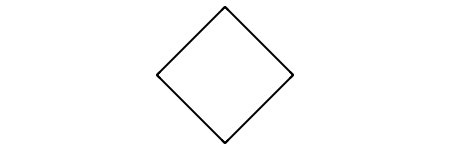

In [60]:
m2

In [62]:
# note que nessa notação de SMILES os hidrogênios estão implícitos. Para adicionar:

from rdkit.Chem import AllChem
m3 = Chem.AddHs(m2)
AllChem.EmbedMolecule(m3,randomSeed=0xf00d)

0

In [63]:
print(Chem.MolToMolBlock(m3))


     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0256    0.2491   -0.0964 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0435   -0.2466   -0.0266 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2104   -0.9922   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4182    0.7667   -0.9782 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8181    0.1486    0.6820 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1697    1.0826    1.5236 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5336    1.8391   -0.1051 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6809   -0.0600   -0.8987 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6501   -0.6194    0.8220 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4659   -1.7768    0.3858 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3439   -1.3147   -1.3988 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2 

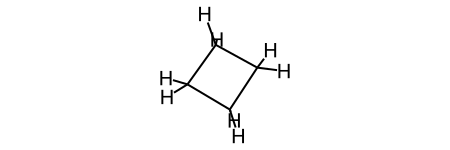

In [64]:
m3

In [65]:
# Para remover usa-se:

m3 = Chem.RemoveHs(m3)
print(Chem.MolToMolBlock(m3))


     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0256    0.2491   -0.0964 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0435   -0.2466   -0.0266 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2104   -0.9922   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



Se quiser escrever em um arquivo de saída, pode usar o objeto de arquivo Python como segue:

In [66]:
print(Chem.MolToMolBlock(m2),file=open('data/ciclobutano.mol','w+'))